# John T Foxworthy

## Linear deterministic models implemented with Probabilistic Random Forest and Gradient Boosting. 

## ElasticNet, Lasso, Random Forest, Gradient Boosting and Extreme Gradient Boosting

## Summary at the far bottom


In [1]:
# Data Description File from Kaggle

text_file = open('data_description.txt')
file_content = text_file.read()
print(file_content)
text_file.close()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [2]:
# Common imports
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Remove annoying warnings
import warnings

warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv("train.csv", header = 0, delimiter = ",")
df_test = pd.read_csv("test.csv", header = 0, delimiter = ",")
sub_df = pd.read_csv("sample_submission.csv", header = 0, delimiter = ",")
df_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
# test datafram joined with sample submissions
df_test = sub_df.merge(df_test)

In [5]:
print("Train set shape:", df_train.shape)
print("Test set shape:", df_test.shape)

Train set shape: (1460, 81)
Test set shape: (1459, 81)


In [6]:
# Statistical Summary with no categorical variables, just numerical
pd.options.display.float_format = '{:,.2f}'.format
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,"1,460.00","1,460.00","1,201.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,452.00","1,460.00",...,"1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00"
mean,730.50,56.90,70.05,"10,516.83",6.10,5.58,"1,971.27","1,984.87",103.69,443.64,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,"2,007.82","180,921.20"
std,421.61,42.30,24.28,"9,981.26",1.38,1.11,30.20,20.65,181.07,456.10,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,"79,442.50"
min,1.00,20.00,21.00,"1,300.00",1.00,1.00,"1,872.00","1,950.00",0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,"2,006.00","34,900.00"
25%,365.75,20.00,59.00,"7,553.50",5.00,5.00,"1,954.00","1,967.00",0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,"2,007.00","129,975.00"
50%,730.50,50.00,69.00,"9,478.50",6.00,5.00,"1,973.00","1,994.00",0.00,383.50,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,"2,008.00","163,000.00"
75%,"1,095.25",70.00,80.00,"11,601.50",7.00,6.00,"2,000.00","2,004.00",166.00,712.25,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,"2,009.00","214,000.00"
max,"1,460.00",190.00,313.00,"215,245.00",10.00,9.00,"2,010.00","2,010.00","1,600.00","5,644.00",...,857.00,547.00,552.00,508.00,480.00,738.00,"15,500.00",12.00,"2,010.00","755,000.00"


### There are 38 fields to describe that are continuous.  I will have to revisit this describe table.

In [7]:
df_train['TotalArea'] = df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']
df_test['TotalArea'] = df_test['TotalBsmtSF'] + df_test['1stFlrSF'] + df_test['2ndFlrSF']

In [8]:
# Old columns are deleted

for i in ['TotalBsmtSF', '1stFlrSF', "2ndFlrSF"]:
    df_train = df_train.drop(i, axis = 1)
    df_test = df_test.drop(i, axis = 1)

In [9]:
print("Train set shape:", df_train.shape)
print("Test set shape:", df_test.shape)

Train set shape: (1460, 79)
Test set shape: (1459, 79)


### Decreasing the columns from 81 to 79.

## Uncommon data points as outliers in the Training Set

### Outliers that are not meaningful to the overall dataset may cause difficult with prediction, but meaningful outliers to the overall dataset may describe the future direction of the dataset.  Nonetheless, let's take a look at outliers.

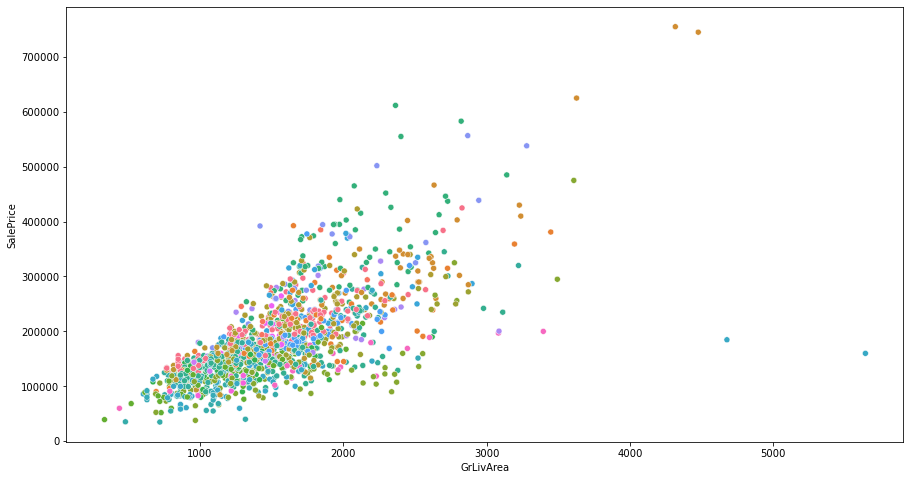

In [10]:
plt.figure(figsize=(15,8))
sns.scatterplot(x = df_train['GrLivArea'], y = df_train['SalePrice']
                , hue = df_train['Neighborhood']
                , legend = False)

In [11]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

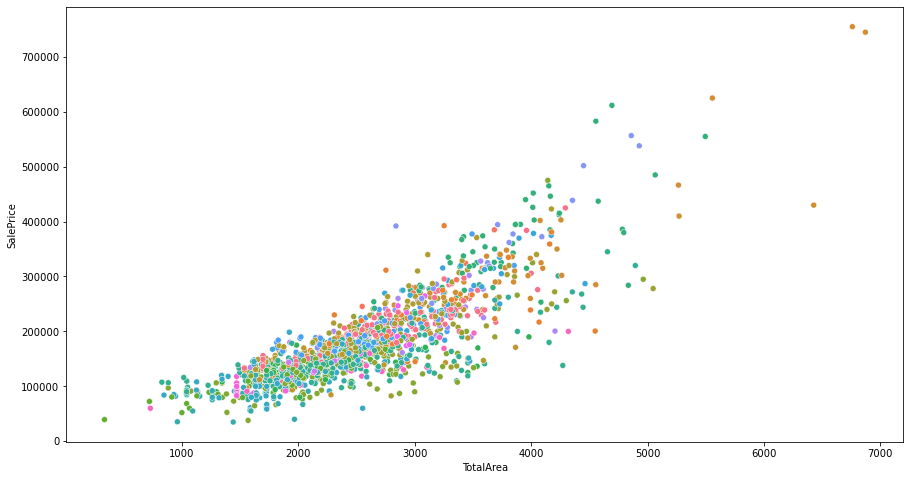

In [12]:
# Total Area

plt.figure(figsize=(15,8))
sns.scatterplot(x = df_train['TotalArea'], y = df_train['SalePrice']
                , hue = df_train['Neighborhood'], legend = False)

### kind of looks linear

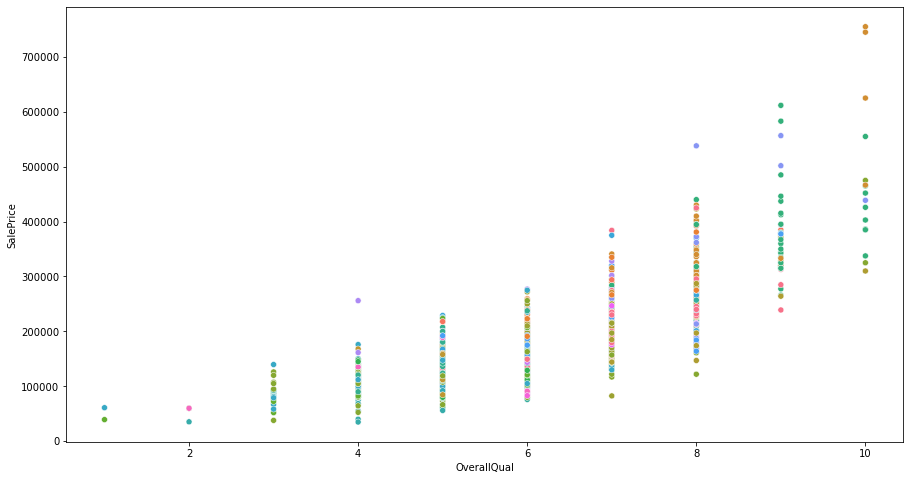

In [13]:
# OverallQual

plt.figure(figsize=(15,8))
sns.scatterplot(x = df_train['OverallQual'], y = df_train['SalePrice']
                , hue = df_train['Neighborhood'], legend = False)


### No major concerns here on OverallQual above and now let's revisit the training set below.

In [14]:
len_train = df_train.shape[0]
len_train

1458

### Joining both datasets

In [15]:
df_concat = pd.concat([df_train, df_test], sort = False)
df_concat.shape

(2917, 79)

In [16]:
df_concat = df_concat.drop("Id", axis = 1)

### Normalize the strong skew target sale price by a log transforming the target variable

Skew: 2.55


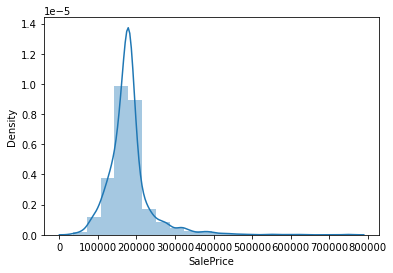

In [17]:
sns.distplot(df_concat['SalePrice'], bins = 20)
print("Skew:", round(df_concat['SalePrice'].skew(),2))

In [18]:
df_concat["SalePrice"] = np.log1p(df_concat["SalePrice"])

Skew: -0.15


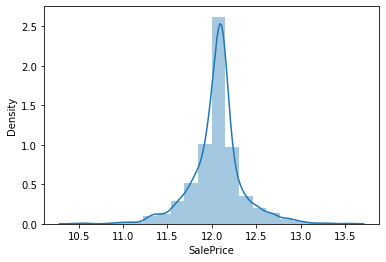

In [19]:
sns.distplot(df_concat['SalePrice'], bins = 20)
print("Skew:", round(df_concat['SalePrice'].skew(),2))

## Cleaning up the missing values

### Features separation of categories and continuous variables

In [20]:
continuous = []
categorical = []

for i in df_concat.columns:
    if df_concat[i].dtype == "object":
        categorical.append(i)
    else: continuous.append(i)

print("Continuous:", continuous)
print("-")
print("Categorical:", categorical)

Continuous: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'TotalArea']
-
Categorical: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQua

### Categorical Feature Variables

In [21]:
# Categorical 

isna_sum = df_concat[categorical].isna().sum()
NaN_columns = [i for i in isna_sum.index if df_concat[i].isna().sum() !=0]
df_NaN_values = df_concat[NaN_columns]
missing_categorical = pd.DataFrame(df_NaN_values.isna().sum(), columns = ["Missing values"])
missing_categorical.sort_values(["Missing values"], axis = 0, ascending = False)

,Missing values
PoolQC,2908
MiscFeature,2812
Alley,2719
Fence,2346
FireplaceQu,1420
GarageQual,159
GarageFinish,159
GarageCond,159
GarageType,157
BsmtCond,82


In [22]:
df_concat["Functional"].fillna("Typ", inplace = True)

In [23]:
# Filling the missing NA's 

for i in ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
            'BsmtFinType2', "MasVnrType", "MSSubClass", "FireplaceQu"]:
    
    df_concat[i].fillna("NA", inplace = True)

In [24]:
isna_sum = df_concat[categorical].isna().sum()
NaN_columns = [i for i in isna_sum.index if df_concat[i].isna().sum() !=0]
df_NaN_values = df_concat[NaN_columns]
df_NaN_values.isna().sum()

MSZoning       4
Utilities      2
Exterior1st    1
Exterior2nd    1
Electrical     1
KitchenQual    1
SaleType       1
dtype: int64

In [25]:
# filling the mode for the other cateogorical variables 

for i in ["MSZoning", "Utilities", "Exterior1st", "Exterior2nd", "Electrical", "KitchenQual", "SaleType"]:
    df_concat[i].fillna(df_concat[i].mode()[0], inplace = True)

### Continuous Feature Variables

In [26]:
isna_sum = df_concat[continuous].isna().sum()
NaN_columns = [i for i in isna_sum.index if df_concat[i].isna().sum() !=0]
df_NaN_values = df_concat[NaN_columns]
missing_continuous = pd.DataFrame(df_NaN_values.isna().sum(), columns = ["Missing values"])
missing_continuous.sort_values(["Missing values"], axis = 0, ascending = False)

,Missing values
LotFrontage,486
GarageYrBlt,159
MasVnrArea,23
BsmtFullBath,2
BsmtHalfBath,2
BsmtFinSF1,1
BsmtFinSF2,1
BsmtUnfSF,1
GarageCars,1
GarageArea,1


### The linear feet of street connected to property, LotFrontage, is a significant missing value correlated with price.  I will group by neighborhood and fill in missing values by the median.

In [27]:
df_concat["LotFrontage"] = df_concat.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [28]:
for i in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 
            'BsmtHalfBath', "MasVnrArea", "TotalArea"):
    
    df_concat[i].fillna(0, inplace = True)

In [29]:
# missing value check
sum(df_concat.isna().sum())

0

### Inspection of skewed continuous features

In [30]:
big_skew = [feature for feature in continuous if abs(df_concat[feature].skew()) > 0.75]

In [31]:
print("High skewed data:", big_skew)
len(big_skew)

High skewed data: ['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr', 'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'TotalArea']


20

### Transform non - normal variables to normal with a Box Cox Transformation with a 0.15 lambda parameter.

In [32]:
from scipy.special import boxcox1p
for feature in big_skew:
    df_concat[feature] = boxcox1p(df_concat[feature], 0.15)

### Categorical value dummy handling

In [33]:
df_concat = pd.get_dummies(df_concat)
print(df_concat.shape)

(2917, 301)


In [34]:
df_concat.shape

(2917, 301)

### Data Splitting

In [35]:
len_train

1458

In [36]:
train_set_final = df_concat.iloc[:len_train,:]
test_set_final = df_concat.iloc[len_train:,:]

In [37]:
print(train_set_final.shape)
print(test_set_final.shape)

(1458, 301)
(1459, 301)


## Prediction Models

In [38]:
# Splitting the train data frame into train and test subsets

from sklearn.model_selection import train_test_split

X = train_set_final.drop('SalePrice',axis=1)
y = train_set_final[['SalePrice']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [39]:
X_submission = test_set_final.drop('SalePrice',axis=1)

In [41]:
# Models to test the score

from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

import xgboost as xgb

modelsFinal = []
modelsFinal.append(('ENet', make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))))
modelsFinal.append(('Lasso', make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))))
modelsFinal.append(('RF',RandomForestRegressor()))
modelsFinal.append(('GB',GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)))
modelsFinal.append(("Xgb",xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)))

In [42]:
def compute_models(X, y):
    names = []
    scores = []
    frame = pd.DataFrame()
    
    for name, model in modelsFinal:
        model.fit(X, y)
        prediction = model.predict(X_submission)
        frame[name] = prediction
        scores.append(model.score(X_test,y_test))
        names.append(name)
    
    bla = pd.DataFrame(scores, index = names, columns = ["score"])
    print(bla)
    
    return frame

In [44]:
frame = compute_models(X_train, y_train)

[14:49:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


       score
ENet    0.91
Lasso   0.91
RF      0.88
GB      0.90
Xgb     0.91


In [45]:
frame.head()

,ENet,Lasso,RF,GB,Xgb
0,11.68,11.68,11.77,11.73,11.74
1,11.95,11.95,11.95,12.00,12.00
2,12.13,12.13,12.08,12.17,12.15
3,12.20,12.20,12.14,12.22,12.18
4,12.15,12.15,12.17,12.14,12.17


In [46]:
frame["mean"] = (frame["ENet"] + frame["Lasso"] + frame["Xgb"])/3

In [47]:
frame.head(10)

,ENet,Lasso,RF,GB,Xgb,mean
0,11.68,11.68,11.77,11.73,11.74,11.70
1,11.95,11.95,11.95,12.00,12.00,11.97
2,12.13,12.13,12.08,12.17,12.15,12.13
3,12.20,12.20,12.14,12.22,12.18,12.19
4,12.15,12.15,12.17,12.14,12.17,12.16
5,12.05,12.05,12.10,12.04,12.05,12.05
6,12.06,12.06,12.06,12.08,12.07,12.06
7,11.99,11.99,12.07,12.01,11.99,11.99
8,12.19,12.19,12.17,12.08,12.14,12.17
9,11.68,11.68,11.69,11.73,11.69,11.69


### Submission process

In [48]:
Id = sub_df["Id"].values
predictions_id = list(zip(Id,frame["mean"]))

In [49]:
submission = pd.DataFrame(predictions_id , columns = ["Id", "SalePrice"])

In [50]:
submission.head(3)

,Id,SalePrice
0,1461,11.70
1,1462,11.97
2,1463,12.13


In [51]:
submission["SalePrice"] = np.expm1(submission["SalePrice"])

In [52]:
submission.head(4)

,Id,SalePrice
0,1461,"120,711.32"
1,1462,"157,253.97"
2,1463,"186,231.95"
3,1464,"197,307.57"


In [53]:
len(submission)

1459

In [54]:
submission.to_csv('submission_1b.csv',sep=',', encoding='utf-8', index=False)

In [55]:
submission["SalePrice"].isna().sum()

0

# Summary

### Many features can explain housing prices that can be generalized into two groups.  Deterministic features that drive value like lot size in square feet, LotArea, that move in tandem with price and probabilistic features that may not be captured in the provided dataset such as when a property is up for sale.

### There are tight validation scores between the models that show a slight edge of linear deterministic models like ElasticNet and Lasso from a sequential approach of data, model and prediction.  Secondly, the Random Forest that contributes to the randomness of the data and high dimensional dataset, also with a sequential approach of modeling had a slightly less score comparied to other models.

### Gradient Boosting and Extreme Gradient Boosting peformed equally to linear deterministic models, but from a different modeling approach that matures and iterates over time with error reduction.

### Regardless, more needs to be done such as explaining the parameters to add explanatory power and learning more about the provided dataset to enhance domain knowledge for delivery.